In [49]:
import numpy as np
import matplotlib.pyplot as plt

In [233]:
#Initialization
f=np.zeros((3,N+1,t_number))
f_sm=np.zeros((3,N+1,t_number))
f0 = np.zeros((3, N+1))
f_middle = np.zeros((3, N+1))
f1 = np.zeros((3, N+1))
f1_smooth = np.zeros((3, N+1))
Q_minus = np.zeros((3))
Q_plus = np.zeros((3))

p1 = 0.7
p2 = 0.8
ro1 = 0.9
ro2 = 1.1
u1 = 1
u2 = 0.6

gamma = 1.4
q = 0.05

In [234]:
initial(f)
initial(f_sm)

In [235]:
#Calculation
for n in range(0, t_number-1):
    f[:,:,n+1]=nextLayer(f,n,"not smooth")
    f_sm[:,:,n+1]=nextLayer(f_sm,n,"smooth")
r_p_v=getOriginal_r_p_v(f)
r_p_v_sm=getOriginal_r_p_v(f_sm)

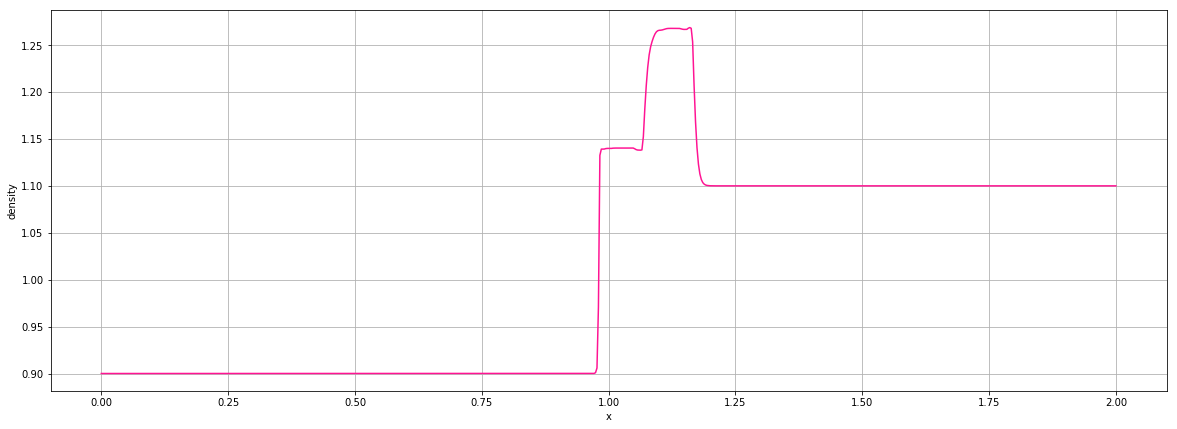

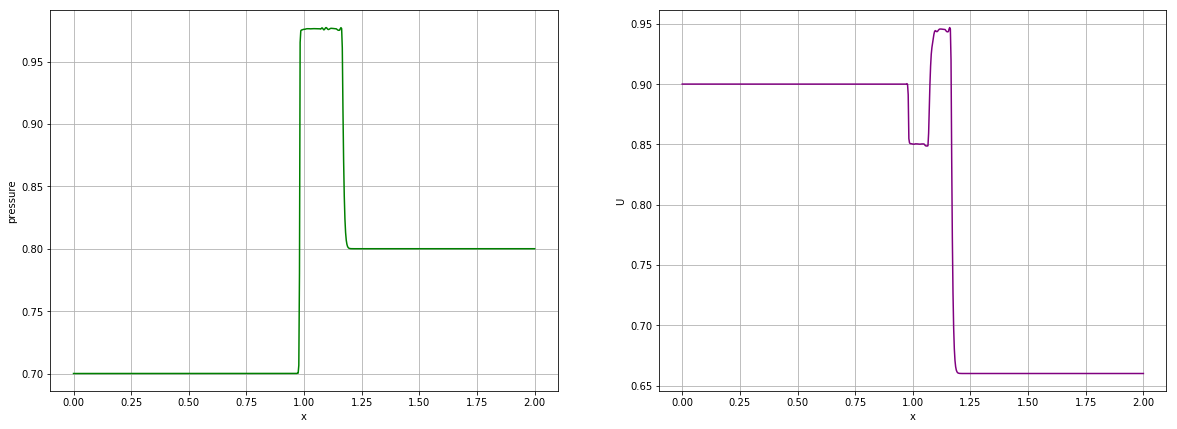

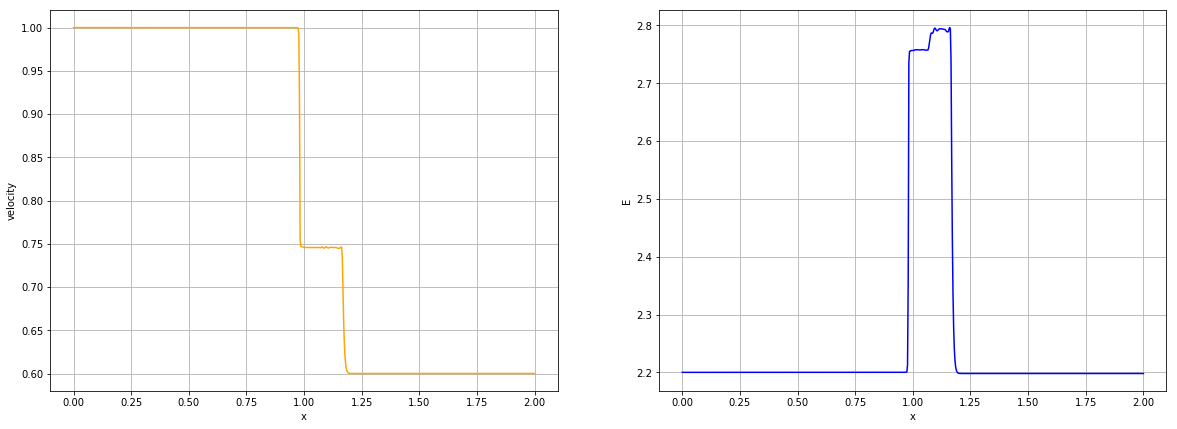

In [286]:
draw(f_sm,r_p_v_sm,699)

In [281]:
Courrant=0.05
N=700
t_number=700

xleft = 0
xright = 2
xmiddle = 1
h = (xright-xleft)/N
tau = Courrant*h
T = (int)(t_number*tau)

In [72]:
def F(f,i):
    F=np.zeros(3)
    F[0]=f[1,i]
    F[1]=f[1,i]**2/f[0,i] + (f[2,i]-f[1,i]**2/(2*f[0,i]))*(gamma-1)
    F[2]=(f[1,i]/f[0,i])*(f[2,i]+(f[2,i]-f[1,i]**2/(2*f[0,i]))*(gamma-1))
    return F

In [206]:
def initial(f):
    f[0,:int((xmiddle-xleft)/h)+1,0] = ro1
    f[0,int((xmiddle-xleft)/h)+1:,0] = ro2
    
    f[1,:int((xmiddle-xleft)/h)+1,0] = ro1*u1
    f[1,int((xmiddle-xleft)/h)+1:,0] = ro2*u2
    
    f[2,:int((xmiddle-xleft)/h)+1,0] = p1/(gamma-1) + (ro1*u1)**2/(2*ro1)
    f[2,int((xmiddle-xleft)/h)+1:,0] = p2/(gamma-1) + (ro2*u2)**2/(2*ro2)

def edge(f):
    f[0,0] = ro1
    f[0,N] = ro2
    
    f[1,0] = ro1*u1
    f[1,N] = ro2*u2
    
    f[2,0] = p1/(gamma-1) + (ro1*u1)**2/(2*ro1)
    f[2,N] = p2/(gamma-1) + (ro2*u2)**2/(2*ro2)

In [232]:
def nextLayer(f,n,smooth):
    f0=f[:,:,n]
    edge(f0)
    edge(f_middle)
    edge(f1)
    edge(f1_smooth)
    
    for i in range(1, N):
        f_middle[:,i] = f0[:,i]-Courrant*(F(f0, i+1) - F(f0,i))
        f1[:,i] = (f0[:,i] + f_middle[:,i])/2 - (Courrant/2)*(F(f_middle,i) - F(f_middle,i-1))
    
    if smooth=="not smooth":
        return f1
    if smooth=="smooth":
        for j in range(1, N):
            if (j-2)<0:
                j_m2 = 0
            else:
                j_m2 = j-2
            if (j+2)>N:
                j_p2 = N
            else:
                j_p2 = j+2            
            
            Dmm = f1[0,j-1] - f1[0,j_m2]
            Dm = f1[0,j] - f1[0,j-1]
            Dp = f1[0,j+1] - f1[0,j]
            Dpp = f1[0,j_p2] - f1[0,j+1]
            if (Dmm*Dm <= 0) or (Dm*Dp <= 0):
                Q_minus[:]  = f1[:,j] - f1[:,j-1]
            else:
                Q_minus[:]  = 0           
            if (Dm*Dp <= 0) or (Dp*Dpp <= 0):
                Q_plus[:]  = f1[:,j+1] - f1[:,j]                
            else:
                Q_plus[:]  = 0       
    
            f1_smooth[:,j] = f1[:,j] + q*(Q_plus[:]-Q_minus[:])
                
        return f1_smooth

In [77]:
def getOriginal_r_p_v(f):
    originals=np.zeros_like(f)
    originals[0]=f[0]
    originals[1]=(f[2]-f[1]**2/(2*f[0]))*(gamma-1)
    originals[2]=f[1]/f[0]
    return originals

In [274]:
def draw(f,r_p_v,t):
    x = np.zeros((N+1))  
    for i in range(0, N+1):
        x[i] = i*h
        
        
    fig1 = plt.figure(figsize=(20,7))
    ax1 = fig1.add_subplot(1, 1, 1)
    ax1.plot(x, r_p_v[0,:,t], color='deeppink')
    ax1.set_xlabel('x')
    ax1.set_ylabel('density')
    ax1.grid() 
    
    fig2 = plt.figure(figsize=(20,7))
    ax2 = fig2.add_subplot(1, 2, 1)
    ax2.plot(x, r_p_v[1,:,t], color='green')
    ax2.set_xlabel('x')
    ax2.set_ylabel('pressure')
    ax2.grid() 
    
    ax5 = fig2.add_subplot(1, 2, 2)
    ax5.plot(x, f[1,:,t], color='purple')
    ax5.set_xlabel('x')
    ax5.set_ylabel('U')
    ax5.grid()
    
    fig3 = plt.figure(figsize=(20,7))
    ax3 = fig3.add_subplot(1, 2, 1)
    ax3.plot(x, r_p_v[2,:,t], color='orange')
    ax3.set_xlabel('x')
    ax3.set_ylabel('velocity')
    ax3.grid() 

    ax6 = fig3.add_subplot(1, 2, 2)
    ax6.plot(x, f[2,:,t], color='blue')
    ax6.set_xlabel('x')
    ax6.set_ylabel('E')
    ax6.grid()